In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import healpy as hp
import scipy.stats
from pylab import cm

In [116]:
#Storing the Sampled beta values. beta 10, Beta 11r and beta11i
burnin = 7000
file_path = '/home/vaishali/Desktop/accepted_m1M_pol_param_run1_bl_smica.dat'
file_path1 = '/home/vaishali/Desktop/accepted_m1M_pol_hpc_run2_bl_smica.dat'
b_pol1 = np.loadtxt(file_path, skiprows=burnin, usecols=(0,1,3), unpack=True)
b_pol2 = np.loadtxt(file_path1, skiprows=burnin, usecols=(0,1,3), unpack=True)
b_pol = np.concatenate((b_pol1.T, b_pol2.T), axis=0)
b_pol = b_pol.T

In [95]:
b10_pol = b_pol[0,burnin:]
b11r_pol=b_pol[1,burnin:]
b11i_pol=b_pol[2,burnin:]
data = np.array([b10_pol,b11r_pol,b11i_pol])
print(data.shape)

(3, 16163)


In [158]:
Beta_pol = np.sqrt(np.square(b10_pol)+ 2*np.square(b11r_pol) + 2*np.square(b11i_pol))*np.sqrt(3/(4*np.pi))
b_act = 1.23
(mu_pol, sigma_pol) = norm.fit(Beta_pol)
Beta1=sorted(Beta_pol)
print(mu_pol)
print(sigma_pol)
x1 = mu_pol+sigma_pol
x2 = mu_pol-sigma_pol
x3 = mu_pol+2*sigma_pol
x4 = mu_pol-2*sigma_pol
x5 = mu_pol+3*sigma_pol
x6 = mu_pol-3*sigma_pol

2.6116729307275914
0.7071932892231756


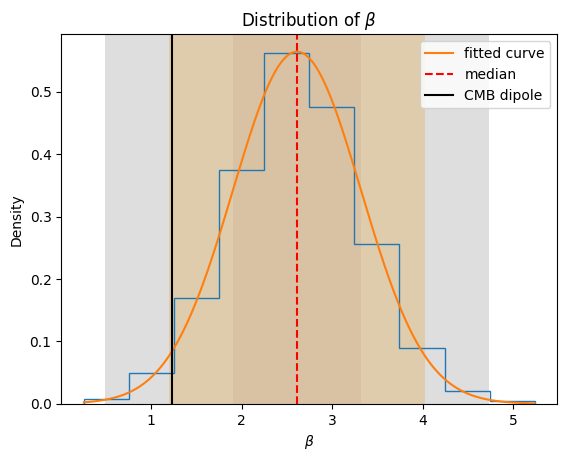

In [172]:
n,bins,patches=plt.hist(Beta_pol,density=True,fill=False,histtype='step')
plt.plot(Beta1,norm.pdf(Beta1, mu_pol, sigma_pol),label='fitted curve')
plt.axvspan(x1,x2, color='brown', alpha=0.75, lw=0)
plt.axvspan(x3,x4, color='orange', alpha=0.75, lw=0)
plt.axvspan(x5,x6, color='lightgrey', alpha=0.75, lw=0)
#plt.axvline(beta,color='green',linestyle='dashed',label='mean of the histogram')
#plt.axvline(beta_mode,color='yellow',linestyle='dashed',label='maximum posterior point')
plt.axvline(mu_pol,color='red',linestyle='dashed',label='median')
plt.fill()
plt.axvline(b_act,color='black',label='CMB dipole')
plt.xlabel(r'$\beta$')
plt.title(r'Distribution of $\beta$')
plt.ylabel('Density')
plt.legend()
plt.show()

Joint Distribution of Theta and Phi

In [98]:
def values(m10,m11r,m11i):
    beta = math.sqrt(3/(4*math.pi))*math.sqrt(m10**2 + 2*(m11r**2) + 2*(m11i**2))
    theta = math.acos((math.sqrt(3/(4*math.pi)))*(m10/beta))
    theta1 = theta*(180/math.pi)
    phi = math.atan(-m11i/m11r) 
    phi = (phi*(180/math.pi))
    if phi > 0 :
        phi1 = phi + 180
    else:
        phi1 = 360 + phi
    return beta,theta1,phi1

/tmp/ipykernel_558220/958434511.py:27: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  s_map = hp.smoothing(map_hist, sigma = std_dev, verbose = True)
/tmp/ipykernel_558220/958434511.py:30: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  smooth_map = hp.smoothing(map_hist/Norm, sigma = std_dev, verbose = True)


peak_phi, peak_theta
279.0 22.06507135100859
mean_phi, mean_theta
287.5983943282715 20.91876670152476


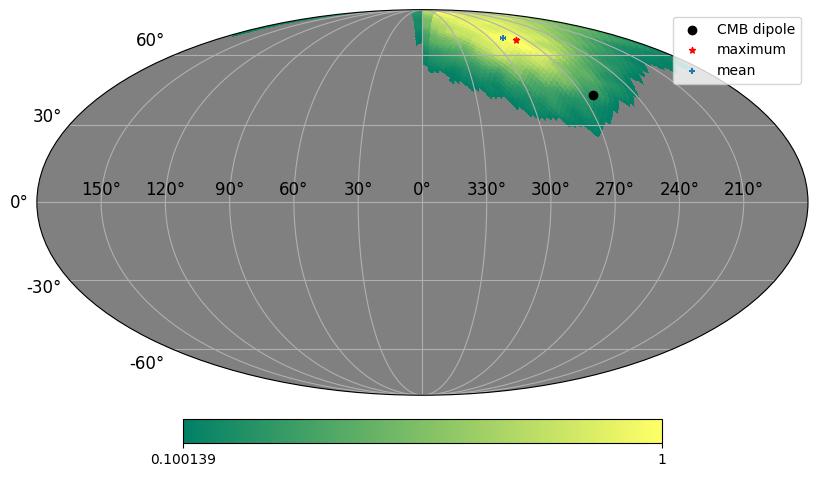

In [147]:
phi_act = 360-264
theta_act = 90-48
Nside = 32
npix = Nside*Nside*12
#Getting the mean values
beta_mean,theta_mean,phi_mean = values(np.mean(data[0,:])*10**-3,np.mean(data[1,:])*10**-3,np.mean(data[2,:])*10**-3)
#Getting pixel values for each theta and phi
ang_for_points = np.ndarray(shape=(data.shape))
for i in range(data.shape[1]):
    ang_for_points[0,i],ang_for_points[1,i],ang_for_points[2,i] = values(data[0,i]*1e-3,data[1,i]*1e-3,data[2,i]*1e-3)


pix = hp.ang2pix(nside = Nside, theta = ang_for_points[1,:]*np.pi/180.0, phi = ang_for_points[2,:]*np.pi/180.0, nest=False)
map_hist = np.arange(0, 12*Nside**2, 1)
mask = np.arange(0, 12*Nside**2, 1)
#Norm = 440.0 #255.0
mask.fill(0.0)
map_hist.fill(0.0)

mapp = map_hist
for i in range(0, len(pix), 1):
    mapp[pix[i]] = mapp[pix[i]] + 1.0

map_hist[pix[:]] = mapp[pix[:]]#/np.max(mapp[pix[:]])

std_dev = hp.nside2resol(nside = Nside, arcmin = False) #(360.0/(4*Nside))*(np.pi/180.0)
s_map = hp.smoothing(map_hist, sigma = std_dev, verbose = True)

Norm = np.max(s_map)
smooth_map = hp.smoothing(map_hist/Norm, sigma = std_dev, verbose = True)

min_pix = 0.1
max_pix = 1.0 #None #1.0
for i in range(0, len(mask), 1):
    if smooth_map[i] >= min_pix:
        mask[i] = 1

masked_map = hp.ma(smooth_map)
masked_map.mask = 1 - mask

peak_pix = np.argmax(smooth_map)
peak_theta, peak_phi = hp.pix2ang(nside = Nside, ipix = peak_pix, nest=False)
print("peak_phi, peak_theta")
print(np.rad2deg(peak_phi), np.rad2deg(peak_theta))
print("mean_phi, mean_theta")
print(phi_mean,theta_mean)

peak_theta_deg = np.rad2deg(peak_theta)
peak_phi_deg = np.rad2deg(peak_phi)

hp.projview(
    masked_map, coord=["G"], graticule=True, graticule_labels=True,latitude_grid_spacing=30,longitude_grid_spacing=30,cmap=cm.summer,projection_type="mollweide"
);
plt.scatter(np.deg2rad(phi_act),np.deg2rad(theta_act),color='black',label='CMB dipole');
plt.scatter(np.deg2rad(360-peak_phi_deg),np.deg2rad(90-peak_theta_deg),marker='*',color='red',s=20,label='maximum');
plt.scatter(np.deg2rad(360-phi_mean),np.deg2rad(90-theta_mean),marker='+',s=20,label='mean');
plt.legend();




Distributions of theta and phi

In [100]:
b_dir = np.ndarray(shape=(data.shape))
for i in range(data.shape[1]):
    b_dir[0,i],b_dir[1,i],b_dir[2,i] = values(data[0,i]*1e-3,data[1,i]*1e-3,data[2,i]*1e-3)

27.50699254179724


Text(0.5, 1.0, 'Distribution of $\\theta$')

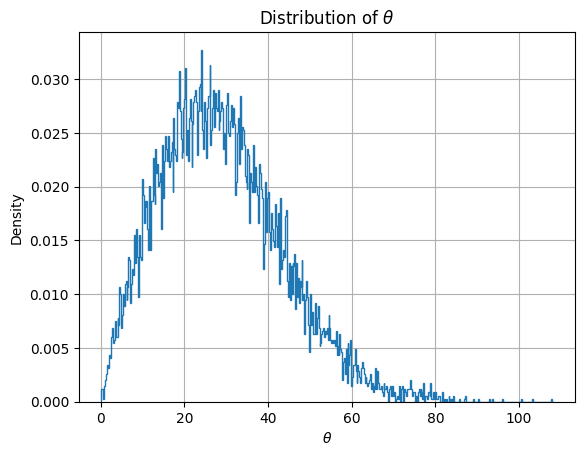

In [146]:
#Distribution of theta
hist = np.histogram(b_dir[1,:], bins=1000,density=False)
hist_dist = scipy.stats.rv_histogram(hist)
pdf_theta = hist_dist.pdf(b_dir[1,:])
mode = pdf_theta.argmax()
theta_mode=b_dir[1,mode]
y,x,_=plt.hist(b_dir[1,:],bins=500,density=True,fill=False,stacked=True,histtype='step')
print(theta_mode)
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.title(r'Distribution of $\theta$')


272.4461126672741


Text(0.5, 1.0, 'Distribution of $\\phi$')

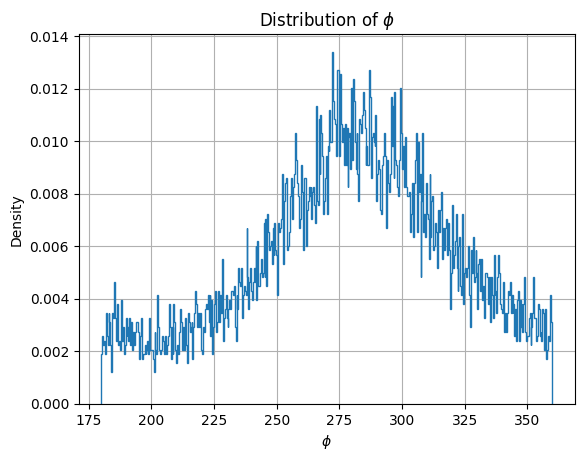

In [145]:
#Distribution of phi
hist = np.histogram(b_dir[2,:], bins='auto',density=False)
hist_dist = scipy.stats.rv_histogram(hist)
pdf_phi = hist_dist.pdf(b_dir[2,:])
mode = pdf_phi.argmax()
phi_mode=b_dir[2,mode]
y,x,_=plt.hist(b_dir[2,:],bins=500,density=True,fill=False,stacked=True,histtype='step')
print(phi_mode)
plt.grid()
plt.xlabel(r'$\phi$')
plt.ylabel('Density')
plt.title(r'Distribution of $\phi$')

Plotting ClEE to check convergence

In [117]:
Cl1 = np.loadtxt('/home/vaishali/Desktop/cl_chain_pol_param_run1_bl_smica.dat', skiprows=burnin,unpack=True)
Cl2 = np.loadtxt('/home/vaishali/Desktop/cl_chain_pol_hpc_run_bl_smica.dat',skiprows=burnin, unpack=True)


In [121]:
Cl = np.concatenate((Cl1.T,Cl2.T),axis=0)
Cl = Cl.T

In [122]:
el = np.ndarray(shape=(1301))
Cl_mean = np.ndarray(shape=(1301))
Cl_median = np.ndarray(shape=(1301))
for i in range(Cl.shape[0]):
    Cl_mean[i]=np.mean(Cl[i,burnin:])
    el[i]=i
ell= el*(el+1)/(2*np.pi)    


In [123]:
power_spec =np.loadtxt('/home/vaishali/Downloads/COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt')

Text(0.5, 1.0, 'Power Spectrum $C_l^{EE}$')

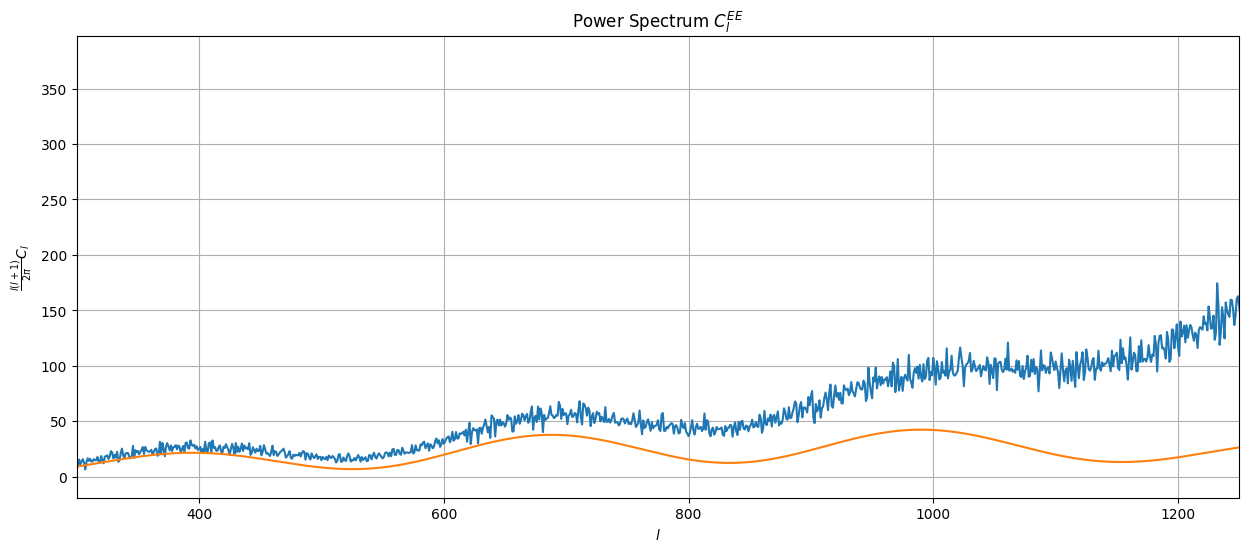

In [138]:
plt.figure(figsize=(15,6))
plt.plot(el[300:],Cl_mean[300:]*ell[300:])
plt.plot(power_spec[:1301,0],power_spec[:1301,3],label='Planck')
plt.xlim([300,1250])
plt.grid()
plt.xlabel(r'$l$')
plt.ylabel(r'$\frac{l(l+1)}{2\pi}C_l$')
plt.title(r'Power Spectrum $C_l^{EE}$')